<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/09_01_LeNet_5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LeNet-5 aplicada a MNIST

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 25.6 MB/s eta 0:00:00


In [ ]:
import visualkeras


### dataset

11490434/11490434 [==============================] - 1s 0us/step
X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


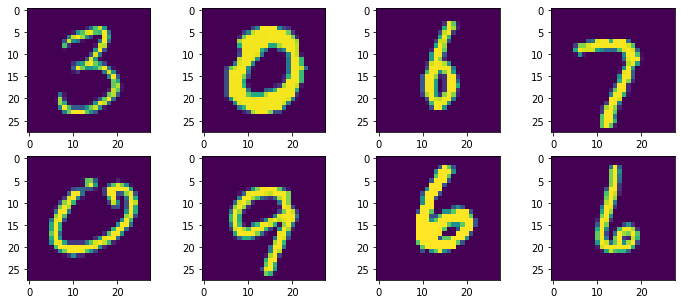

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
print('X_train shape', X_train_full.shape, 'X_test shape', X_test.shape)

# grafico de elementos aleatórios del conjunto de entrenamiento
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train_full))
  plt.subplot(240+1+i)
  plt.imshow(X_train_full[ind])


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
#keras.layers.Conv2D(filters = 6, kernel_size = (5,5), padding = 'same',  activation = 'relu', input_shape = (28,28,1))
#keras.layers.MaxPooling2D(pool_size = (2,2))

model = keras.models.Sequential([
    #capa convolucional
    keras.layers.Conv2D(6, 5, padding = 'same',  activation = 'relu', input_shape = [28, 28, 1]),
    #capa de pooling
    keras.layers.AveragePooling2D(2),
    #capa convolucional
    keras.layers.Conv2D(16, 5, padding = 'same',  activation = 'relu'),
    #capa de pooling
    keras.layers.AveragePooling2D(2),
    #capa convolucional
    keras.layers.Conv2D(120, 5, padding = 'same',  activation = 'relu'),
    keras.layers.Flatten(),
    # red MLP
    keras.layers.Dense(84, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 5880)              0

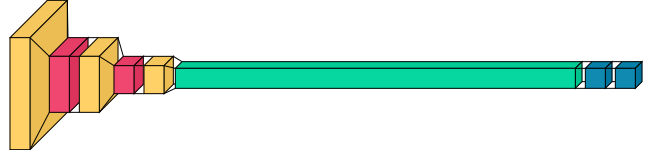

In [ ]:
visualkeras.layered_view(model)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 67s 39ms/step - loss: 0.7171 - accuracy: 0.7830 - val_loss: 0.1997 - val_accuracy: 0.9398
Epoch 2/10
1719/1719 [==============================] - 67s 39ms/step - loss: 0.1776 - accuracy: 0.9454 - val_loss: 0.1217 - val_accuracy: 0.9636
Epoch 3/10
1719/1719 [==============================] - 67s 39ms/step - loss: 0.1235 - accuracy: 0.9626 - val_loss: 0.0981 - val_accuracy: 0.9706
Epoch 4/10
1719/1719 [==============================] - 67s 39ms/step - loss: 0.0961 - accuracy: 0.9705 - val_loss: 0.0772 - val_accuracy: 0.9768
Epoch 5/10
1719/1719 [==============================] - 67s 39ms/step - loss: 0.0796 - accuracy: 0.9748 - val_loss: 0.0681 - val_accuracy: 0.9806
Epoch 6/10
1719/1719 [==============================] - 67s 39ms/step - loss: 0.0661 - accuracy: 0.9794 - val_loss: 0.0657 - val_accuracy: 0.9784
Epoch 7/10
1719/1719 [==============================] - 68s 39ms/step - loss: 0.0579 - accuracy: 0.9812 - val_loss: 0.0582 -